# Description

Authenticate with Reddit: Use praw to connect to Reddit with your credentials.

Get Data: Extract titles from the "novels" subreddit.

Clean Data: Write a function to remove unwanted characters like mentions, hashtags, links, and emojis.

Analyze Sentiment: Use TextBlob to find out if the titles are positive, neutral, or negative.

Visualize Results: Create a bar plot to show the count of positive, neutral, and negative sentiments. Generate a word cloud to see the most common words.

# Social Media Scrapping 


In [2]:
!pip install praw


# Authentication

In [3]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DvQH9ayC-fRBOSZhiLBSUw",
    client_secret="t6c6JZ2Ns7eQdcXQZpajcxlE0eWGDQ",
    user_agent=user_agent
)

In [4]:
import pandas as pd
import numpy as np
import re

## Get Trending Topic from your Subreddit

The "novels" subreddit channel will be use for this project

In [5]:
headlines = set()
for submission in reddit.subreddit("novels").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

5 Epic Romance Novels to Read in Your Lifetime
1cahmpf
Abdulahkabeer
1713809069.0
2
1.0
https://www.reddit.com/r/Novels/comments/1cahmpf/5_epic_romance_novels_to_read_in_your_lifetime/
0


# Get total comment in Subreddit

In [6]:
headlines = set()
for submission in reddit.subreddit("novels").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

904


In [7]:
#Create a dataframe from the scrapped data 
novels_df = pd.DataFrame(headlines)
novels_df.head()

,0
0,Coming of age novel “IN THE SEA OF MY MIND” Am...
1,Anyone know where I can find “Luna graced” by ...
2,Son't Sleep On Short Reads | Fiction & Essays ...
3,Who are the best action/adventure/mystery thri...
4,looking for a kinda old novel


In [8]:
df = novels_df.iloc[:, 1:]
novels_df.head()

,0
0,Coming of age novel “IN THE SEA OF MY MIND” Am...
1,Anyone know where I can find “Luna graced” by ...
2,Son't Sleep On Short Reads | Fiction & Essays ...
3,Who are the best action/adventure/mystery thri...
4,looking for a kinda old novel


In [9]:
novels_df.columns


RangeIndex(start=0, stop=1, step=1)

In [10]:
novels_df.columns = ['Titles']


In [11]:
novels_df.head()


,Titles
0,Coming of age novel “IN THE SEA OF MY MIND” Am...
1,Anyone know where I can find “Luna graced” by ...
2,Son't Sleep On Short Reads | Fiction & Essays ...
3,Who are the best action/adventure/mystery thri...
4,looking for a kinda old novel


In [12]:
novels_df.Titles.duplicated().sum() 


0

In [13]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
novels_df["Titles"]= novels_df["Titles"].apply(cleanTxt)

#Show the clean text
novels_df.head()

,Titles
0,Coming of age novel “IN THE SEA OF MY MIND” Am...
1,Anyone know where I can find “Luna graced” by ...
2,Son't Sleep On Short Reads | Fiction & Essays ...
3,Who are the best action/adventure/mystery thri...
4,looking for a kinda old novel


In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
novels_df["Titles"]= novels_df["Titles"].apply(remove_emoji)

#Show the clean text
novels_df.head()

,Titles
0,Coming of age novel “IN THE SEA OF MY MIND” Am...
1,Anyone know where I can find “Luna graced” by ...
2,Son't Sleep On Short Reads | Fiction & Essays ...
3,Who are the best action/adventure/mystery thri...
4,looking for a kinda old novel


In [16]:
!pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 960.0 kB/s eta 0:00:01
   --- ----------------------------------- 61.4/626.3 kB 812.7 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 944.1 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 944.1 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/626.3 kB 983.0 kB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
novels_df['Subjectivity'] = novels_df['Titles'].apply(getSubjectivity)
novels_df['Polarity'] = novels_df['Titles'].apply(getPolarity)

#Now display data
novels_df.head()

,Titles,Subjectivity,Polarity
0,Coming of age novel “IN THE SEA OF MY MIND” Am...,0.000000,0.000000
1,Anyone know where I can find “Luna graced” by ...,0.000000,0.000000
2,Son't Sleep On Short Reads | Fiction & Essays ...,0.300000,0.000000
3,Who are the best action/adventure/mystery thri...,0.433333,0.377778
4,looking for a kinda old novel,0.200000,0.100000


In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
novels_df["Insight"] = novels_df["Polarity"].apply(getInsight)

novels_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Coming of age novel “IN THE SEA OF MY MIND” Am...,0.000000,0.000000,Neutral
1,Anyone know where I can find “Luna graced” by ...,0.000000,0.000000,Neutral
2,Son't Sleep On Short Reads | Fiction & Essays ...,0.300000,0.000000,Neutral
3,Who are the best action/adventure/mystery thri...,0.433333,0.377778,Positive
4,looking for a kinda old novel,0.200000,0.100000,Positive
5,OPEN WIDE - Chapter 3,0.450000,-0.050000,Negative
6,Interested in a crime/thriller fantasy novel?,0.500000,0.250000,Positive
7,50 Shades of Chance,0.000000,0.000000,Neutral
8,help,0.000000,0.000000,Neutral
9,"Webnovel/Lightnovel/Xianxia etc. Audiobooks, T...",0.000000,0.000000,Neutral


# Data Visualization

In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

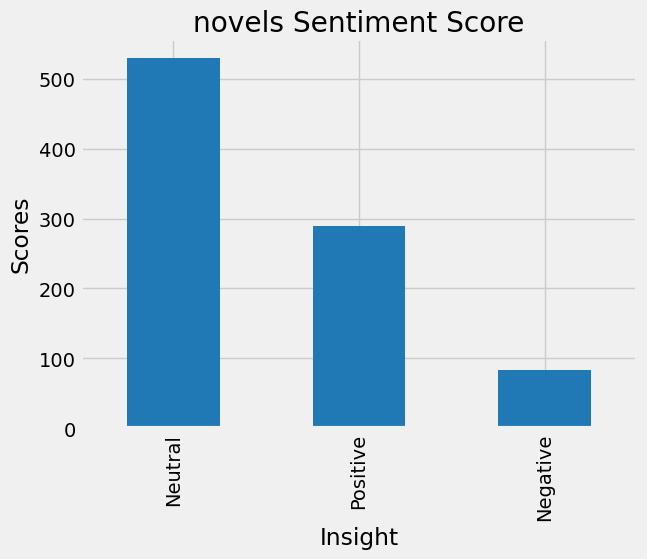

In [21]:
#Plot the values count of sentiment
plt.title("novels Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
novels_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

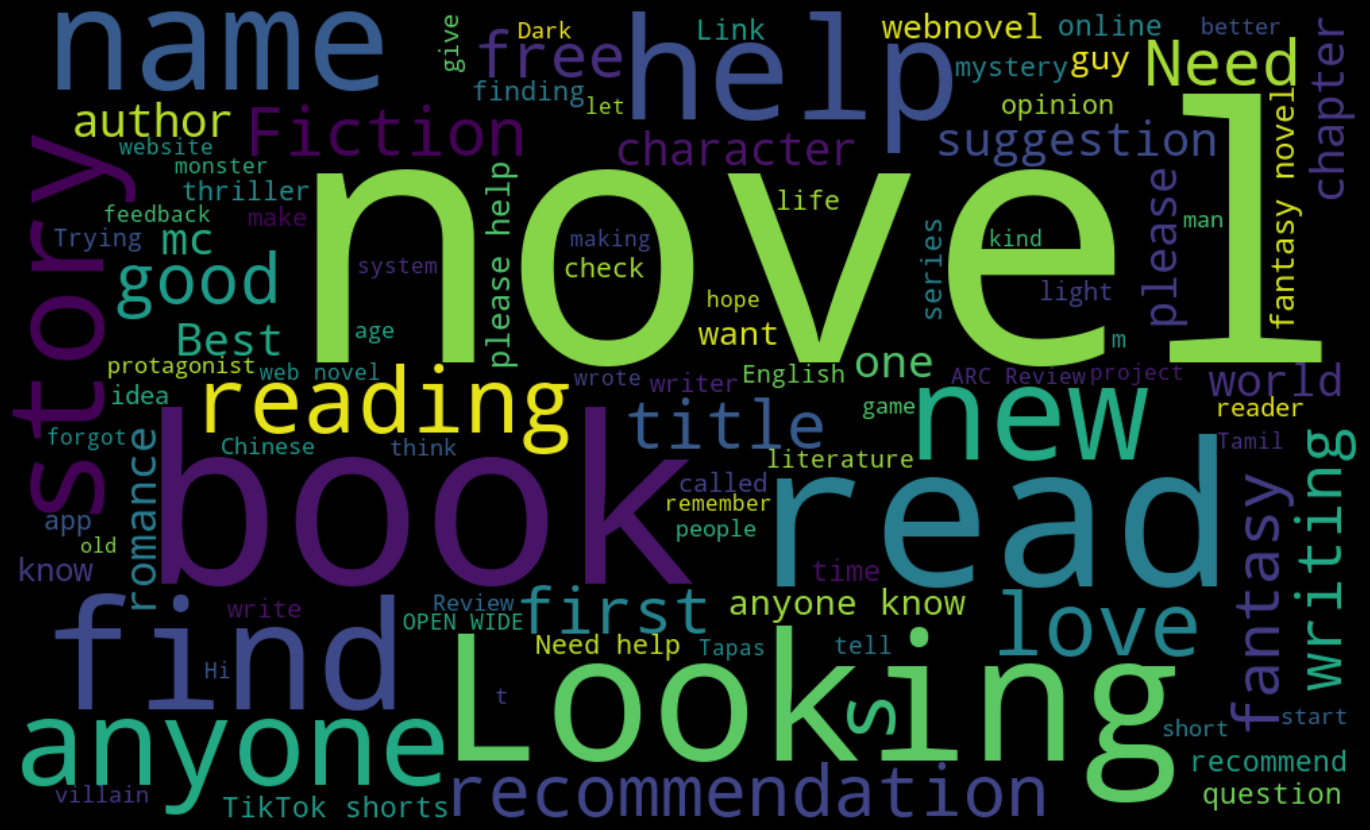

In [22]:
text = ' '.join( [twts for twts in novels_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");